<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Kaggle-and-Project/blob/master/Kaggle_30_Day_ML_Project(Modeling)_08_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os 
from google.colab import drive
drive.mount('/content/drvie')
import pandas as pd

train = pd.read_csv("/content/drvie/MyDrive/30_train.csv")
test = pd.read_csv("/content/drvie/MyDrive/30_test.csv")
sub = pd.read_csv("/content/drvie/MyDrive/30_sample_submission.csv")

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
import random
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [3]:
y = train.target
train.drop(['target', 'id'], axis = 1, inplace = True)
test.drop(['id'], axis = 1, inplace = True)

In [ ]:
train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [ ]:
train.isnull().sum()

cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [ ]:
X=train.copy()

In [ ]:
X

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,B,B,A,A,B,D,A,E,A,I,0.697124,0.483452,0.297770,0.195821,0.307883,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404
299996,A,B,A,C,B,B,A,E,E,F,0.446200,0.715135,0.610931,0.601730,0.736713,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611
299997,B,B,A,C,B,C,A,E,G,F,0.544279,0.060937,0.590955,0.905308,0.277074,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732
299998,A,B,A,C,B,B,A,E,E,I,0.300062,0.613118,0.285213,0.406851,0.805963,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030


In [ ]:
numeric_ = X.select_dtypes(exclude=['object']).copy()
numeric_.columns

Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')

In [ ]:
categoric_ = X.select_dtypes(exclude=['float64']).copy()
categoric_.columns

Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9'],
      dtype='object')

In [ ]:
numeric_var = [] 
numeric_var.append(numeric_.columns)
numeric_var

[Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
        'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
       dtype='object')]

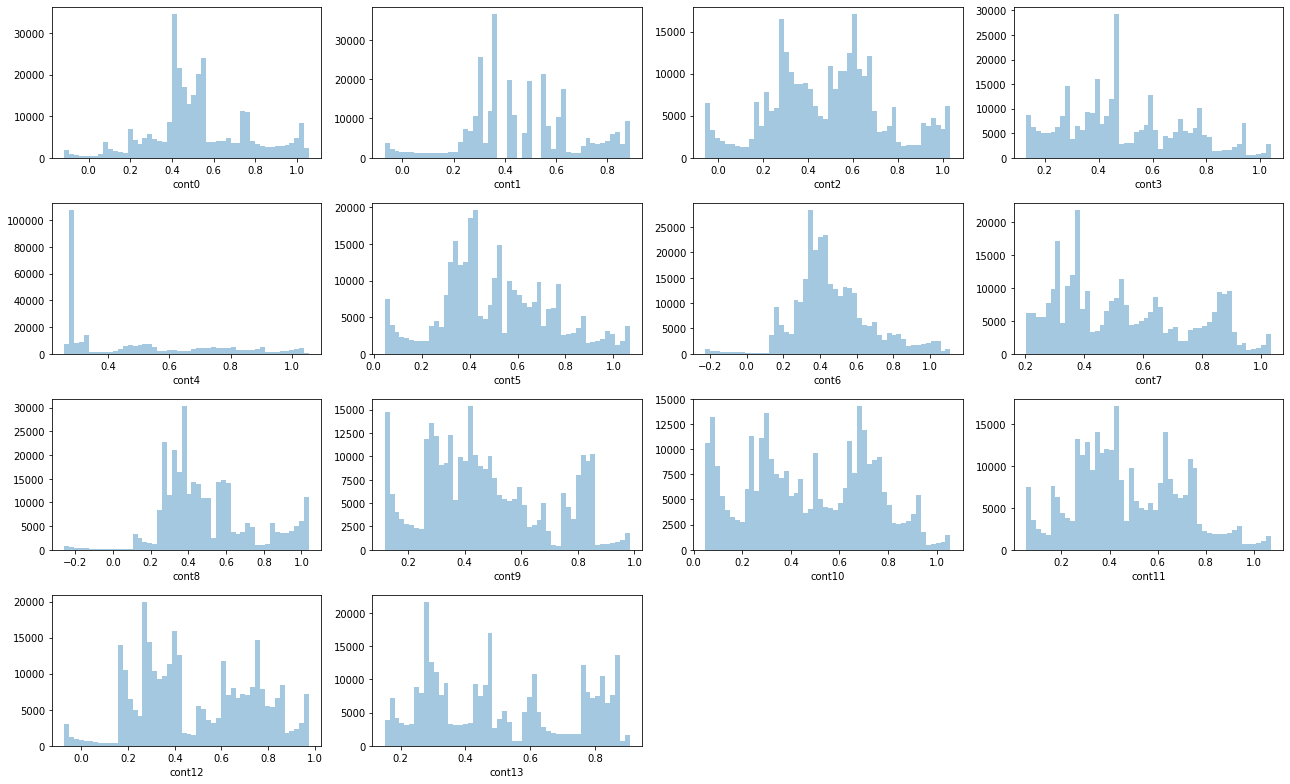

In [ ]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(numeric_): 
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(),kde=False)
fig.tight_layout(pad=1.0)

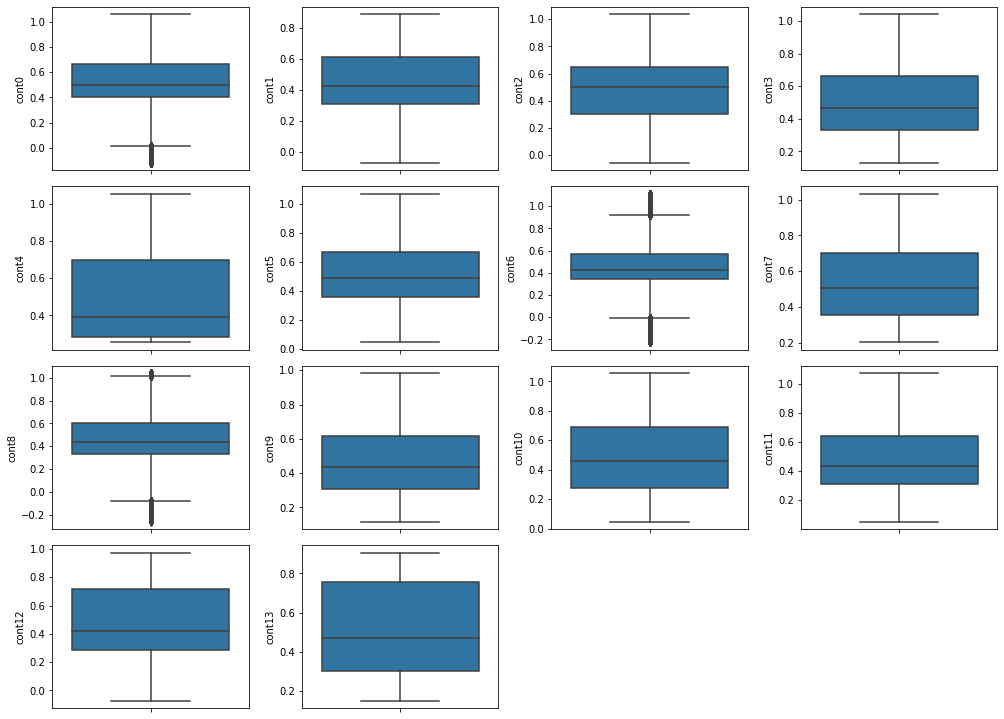

In [ ]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(numeric_):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

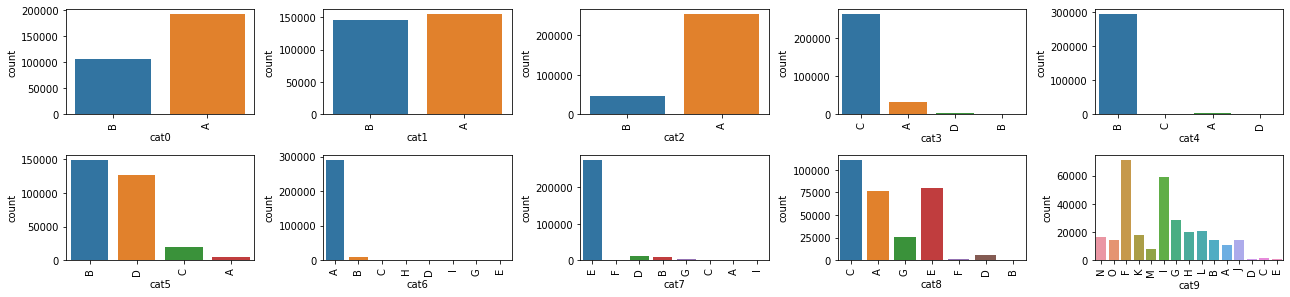

In [ ]:
fig = plt.figure(figsize=(18,20))
for index in range(len(categoric_.columns)):
    plt.subplot(10,5,index+1)
    sns.countplot(x=categoric_.iloc[:,index], data=categoric_.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

In [ ]:
y

0         8.113634
1         8.481233
2         8.364351
3         8.049253
4         7.972260
            ...   
299995    7.945605
299996    7.326118
299997    8.706755
299998    7.229569
299999    8.631146
Name: target, Length: 300000, dtype: float64

In [ ]:
y.describe()

count    300000.000000
mean          8.241979
std           0.746555
min           0.140329
25%           7.742071
50%           8.191373
75%           8.728634
max          10.411992
Name: target, dtype: float64

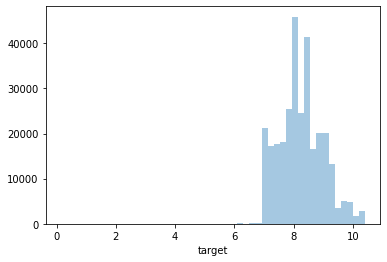

In [ ]:
 sns.distplot(y.dropna(),kde=False)

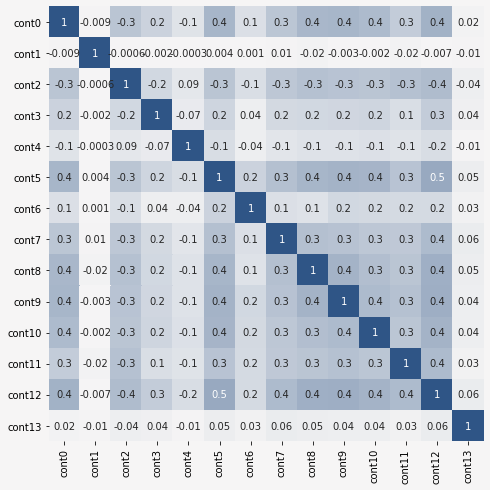

In [ ]:
fig = plt.figure(figsize=(18, 8), facecolor=background_color)
sns.heatmap(numeric_.corr(), vmin=-1, vmax=1, annot=True, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, fmt='.1g')

In [ ]:
corr = numeric_.corr(method='pearson')
corr

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
cont0,1.000000,-0.009422,-0.296989,0.211333,-0.109776,0.392456,0.133995,0.294687,0.388510,0.394969,0.363413,0.255941,0.417872,0.023234
cont1,-0.009422,1.000000,-0.000627,-0.002233,-0.000285,0.003812,0.001321,0.013475,-0.021541,-0.002727,-0.001648,-0.017221,-0.006862,-0.010097
cont2,-0.296989,-0.000627,1.000000,-0.180856,0.092780,-0.300140,-0.141724,-0.283989,-0.326456,-0.309118,-0.300273,-0.325023,-0.352009,-0.039815
cont3,0.211333,-0.002233,-0.180856,1.000000,-0.069934,0.201441,0.040133,0.172586,0.185221,0.194807,0.199525,0.140934,0.255117,0.037920
cont4,-0.109776,-0.000285,0.092780,-0.069934,1.000000,-0.148807,-0.044417,-0.095653,-0.122594,-0.123468,-0.132211,-0.115173,-0.151080,-0.012798
cont5,0.392456,0.003812,-0.300140,0.201441,-0.148807,1.000000,0.211800,0.329357,0.392057,0.411366,0.402053,0.308249,0.473964,0.053779
cont6,0.133995,0.001321,-0.141724,0.040133,-0.044417,0.211800,1.000000,0.135333,0.117833,0.187303,0.178168,0.168731,0.171010,0.031183
cont7,0.294687,0.013475,-0.283989,0.172586,-0.095653,0.329357,0.135333,1.000000,0.332639,0.320239,0.283414,0.279405,0.363091,0.056958
cont8,0.388510,-0.021541,-0.326456,0.185221,-0.122594,0.392057,0.117833,0.332639,1.000000,0.406517,0.341430,0.297121,0.434196,0.050163
cont9,0.394969,-0.002727,-0.309118,0.194807,-0.123468,0.411366,0.187303,0.320239,0.406517,1.000000,0.361941,0.327866,0.437776,0.044631


In [4]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols = [col for col in train.columns if 'cat' in col]

X = train.copy()
X_test = test.copy()
enc = OrdinalEncoder()
X[cat_cols] = enc.fit_transform(train[cat_cols])
X_test[cat_cols] = enc.transform(test[cat_cols])
X.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,13.0,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,14.0,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,5.0,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,10.0,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,13.0,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Model hyperparameters
xgb_params = {'n_estimators': 10000,
              'learning_rate': 0.35,
              'subsample': 0.926,
              'colsample_bytree': 0.84,
              'max_depth': 2,
              'booster': 'gbtree', 
              'reg_lambda': 35.1,
              'reg_alpha': 34.9,
              'random_state': 42,
              'n_jobs': 4}

In [ ]:
cat_cols

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9']

In [7]:
#Setting the kfold parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

oof_preds = np.zeros((X.shape[0],))
preds = 0
model_fi = 0
mean_rmse = 0

for num, (train_id, valid_id) in enumerate(kf.split(X)):
    X_train, X_valid = X.loc[train_id], X.loc[valid_id]
    y_train, y_valid = y.loc[train_id], y.loc[valid_id]
    
    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train,
             verbose = False,
             eval_set = [(X_train, y_train), (X_valid, y_valid)],
             eval_metric = "rmse",
             early_stopping_rounds = 100)
    
    #Mean of the predictions
    preds += model.predict(X_test) / 10 # Splits
    
    #Mean of feature importance
    model_fi += model.feature_importances_ / 10 #splits
    
    #Out of Fold predictions
    oof_preds[valid_id] = model.predict(X_valid)
    fold_rmse = np.sqrt(mean_squared_error(y_valid, oof_preds[valid_id]))
    print(f"Fold {num} | RMSE: {fold_rmse}")
    
    mean_rmse += fold_rmse / 10
    
print(f"\nOverall RMSE: {mean_rmse}")

[08:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 0 | RMSE: 0.7163380340221153
[08:34:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 1 | RMSE: 0.7160567811349912
[08:38:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 2 | RMSE: 0.7154031941272214
[08:43:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 3 | RMSE: 0.717341625250321
[08:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 4 | RMSE: 0.7216675773399901
[08:55:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 5 | RMSE: 0.7150760387257169
[08:59:59] WARNING: /workspace/src/

In [9]:
sub.target = preds
sub.head()

,id,target
0,0,8.086229
1,5,8.388628
2,15,8.368038
3,16,8.511027
4,17,8.135622


In [10]:
sub.to_csv("submission_2.csv", index = False)
print("Sent")

Sent
